<a href="https://colab.research.google.com/github/tashmansara-dotcom/final-project/blob/main/final_project_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/tashmansara-dotcom/final-project/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"

loading and reading data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


aisles=pd.read_csv('/content/aisles.csv')
print('aisles:',aisles.shape)
departments=pd.read_csv('/content/departments.csv')
print('departments:',departments.shape)
orders=pd.read_csv('/content/orders.csv')
print('orders:',orders.shape)
products=pd.read_csv('/content/products.csv')
print('products:',products.shape)
order_products_train=pd.read_csv('/content/order_products__train.csv')
print('order_products_train:',order_products_train.shape)
order_products_prior=pd.read_csv('/content/order_products__prior.csv')
print('order_products_prior:',order_products_prior.shape)
aisles.drop([5,99],inplace=True)
print(aisles.head(10))
aisles=pd.get_dummies(aisles, columns=['aisle'])
departments.drop([1,20],inplace=True)
print(departments)
departments=pd.get_dummies(departments, columns=['department'])
print(departments)
order_products_prior.head(10)
print(order_products_prior.duplicated().any())
print(order_products_prior.isnull().sum())
print(order_products_train.duplicated().any())
print(order_products_train.isnull().sum())
print(orders.duplicated().any())
print(orders.isnull().sum())
print(products.duplicated().any())
print(products.isnull().sum())
num_attr=["days_since_prior_order"]
num_pipeline=Pipeline([
   ('imputer',SimpleImputer(strategy='median')),
   ('std_scaler',StandardScaler())
])



aisles: (134, 2)
departments: (21, 2)
orders: (206262, 7)
products: (49688, 4)
order_products_train: (369428, 4)
order_products_prior: (331537, 4)
    aisle_id                       aisle
0          1       prepared soups salads
1          2           specialty cheeses
2          3         energy granola bars
3          4               instant foods
4          5  marinades meat preparation
6          7               packaged meat
7          8             bakery desserts
8          9                 pasta sauce
9         10            kitchen supplies
10        11            cold flu allergy
    department_id       department
0               1           frozen
2               3           bakery
3               4          produce
4               5          alcohol
5               6    international
6               7        beverages
7               8             pets
8               9  dry goods pasta
9              10             bulk
10             11    personal care
11             12

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

exploring data

<bound method DataFrame.info of         order_id  user_id eval_set  order_number  order_dow  \
0        2539329      1.0    prior           1.0        2.0   
1        2398795      1.0    prior           2.0        3.0   
2         473747      1.0    prior           3.0        3.0   
3        2254736      1.0    prior           4.0        4.0   
4         431534      1.0    prior           5.0        4.0   
...          ...      ...      ...           ...        ...   
206257    993318  12466.0    prior           5.0        4.0   
206258    581187  12466.0     test           6.0        3.0   
206259   1041828  12467.0    prior           1.0        6.0   
206260    423222  12467.0    prior           2.0        6.0   
206261     22139      NaN      NaN           NaN        NaN   

        order_hour_of_day  days_since_prior_order  
0                     8.0                     NaN  
1                     7.0                    15.0  
2                    12.0                    21.0  
3  

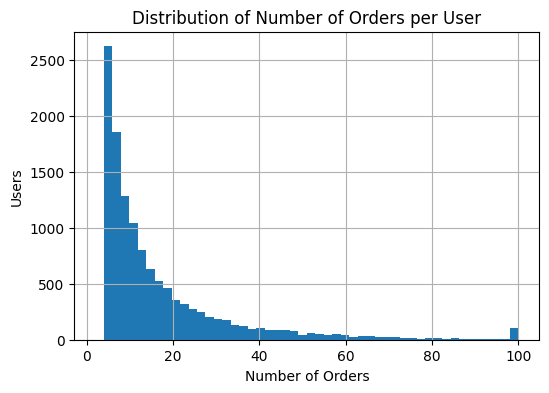

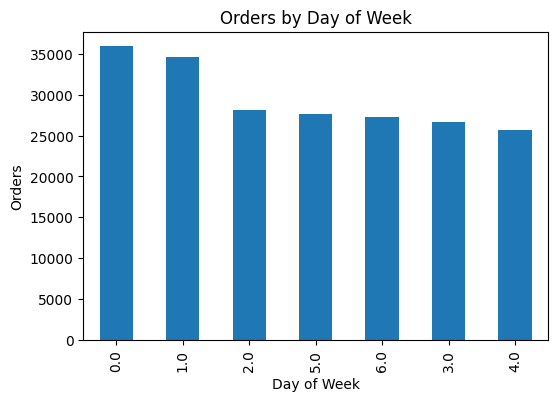

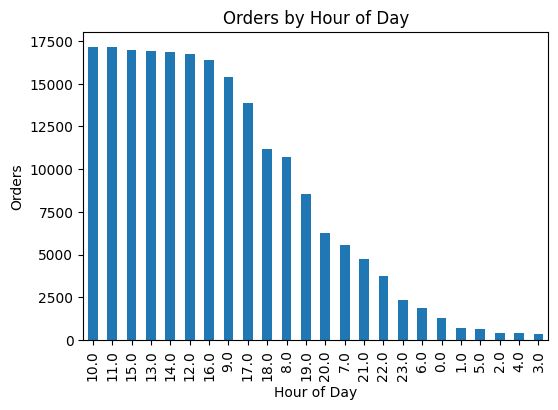

In [ ]:
import matplotlib.pyplot as plt


print(orders.info)
print(orders.describe())
print(orders.isnull().sum)
user_orders=orders['user_id'].value_counts()
print(user_orders.head())
user_orders.hist(bins=50,figsize=(6,4))
plt.title("Distribution of Number of Orders per User")
plt.xlabel("Number of Orders")
plt.ylabel("Users")
plt.show()
dow_counts=orders['order_dow'].value_counts()
plt.figure(figsize=(6,4))
dow_counts.plot(kind='bar')
plt.title("Orders by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Orders")
orders_hour=orders['order_hour_of_day'].value_counts()
plt.figure(figsize=(6,4))
orders_hour.plot(kind='bar')
plt.title("Orders by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Orders")
plt.show()



In [ ]:
ا

cleaning data

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import numpy as np
import pandas as pd
aisles=pd.read_csv('/content/aisles.csv')
departments=pd.read_csv('/content/departments.csv')
orders=pd.read_csv('/content/orders.csv')
onehotencoder=OneHotEncoder()

aisles.drop([5,99],inplace=True)
print(aisles.head(10))
aisles=pd.get_dummies(aisles, columns=['aisle'])
departments.drop([1,20],inplace=True)
print(departments)
departments=pd.get_dummies(departments, columns=['department'])
print(departments)
order_products_prior.head(10)
print(order_products_prior.duplicated().any())
print(order_products_prior.isnull().sum())
print(order_products_train.duplicated().any())
print(order_products_train.isnull().sum()) # Added parentheses
print(orders.duplicated().any())
print(orders.isnull().sum())
print(products.duplicated().any())
print(products.isnull().sum())
le=LabelEncoder()
orders['eval_set']=le.fit_transform(orders['eval_set'])
imputer=SimpleImputer(strategy='median')
orders['days_since_prior_order']=imputer.fit_transform(orders[['days_since_prior_order']])

"""
num_attr=["days_since_prior_order"]
num_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler())
])

preprocessing=ColumnTransformer([
   ("num",num_pipeline,num_attr)
])

orders=preprocessing.fit_transform(orders)
orders=pd.DataFrame(orders,columns=num_attr)
print(orders)
order_products__prior=order_products_prior.dropna()
print(order_products__prior.isnull().sum())
le=LabelEncoder()
order_products__prior['reordered']=le.fit_transform(order_products__prior['reordered'])
"""


    aisle_id                       aisle
0          1       prepared soups salads
1          2           specialty cheeses
2          3         energy granola bars
3          4               instant foods
4          5  marinades meat preparation
6          7               packaged meat
7          8             bakery desserts
8          9                 pasta sauce
9         10            kitchen supplies
10        11            cold flu allergy
    department_id       department
0               1           frozen
2               3           bakery
3               4          produce
4               5          alcohol
5               6    international
6               7        beverages
7               8             pets
8               9  dry goods pasta
9              10             bulk
10             11    personal care
11             12     meat seafood
12             13           pantry
13             14        breakfast
14             15     canned goods
15             16       

'\nnum_attr=["days_since_prior_order"]\nnum_pipeline=Pipeline([\n    (\'imputer\',SimpleImputer(strategy=\'median\')),\n    (\'std_scaler\',StandardScaler())\n])\n\npreprocessing=ColumnTransformer([\n   ("num",num_pipeline,num_attr)\n])\n\norders=preprocessing.fit_transform(orders)\norders=pd.DataFrame(orders,columns=num_attr)\nprint(orders)\norder_products__prior=order_products_prior.dropna()\nprint(order_products__prior.isnull().sum())\nle=LabelEncoder()\norder_products__prior[\'reordered\']=le.fit_transform(order_products__prior[\'reordered\'])\n'

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
df=order_products_prior.merge(orders,on="order_id",how="left")
df=df.merge(products,on="product_id",how="left")
df=df.merge(aisles,on="aisle_id",how="left")
df=df.merge(departments,on="department_id",how="left")
user_orders_count = orders['user_id'].value_counts()
total_items_per_user = df['user_id'].value_counts()
reordered_count_per_user = df[df['reordered']==1]['user_id'].value_counts()
user_features = pd.DataFrame({
    'user_id': user_orders_count.index,
    'user_orders_count': user_orders_count.values
})
user_features = user_features.merge(
    pd.DataFrame({
        'user_id': total_items_per_user.index,
        'total_items_count': total_items_per_user.values
    }),
    on='user_id',
    how='left'
)

user_features = user_features.merge(
    pd.DataFrame({
        'user_id': reordered_count_per_user.index,
        'reordered_items_count': reordered_count_per_user.values
    }),
    on='user_id',
    how='left'
)

user_features['basket_size'] = user_features['total_items_count'] / user_features['user_orders_count']
user_features['reordered_ratio'] = user_features['reordered_items_count'] / user_features['total_items_count']
user_features.fillna(0, inplace=True)
df = df.merge(user_features[['user_id', 'user_orders_count', 'basket_size', 'reordered_ratio']], on='user_id', how='left')
df['days_since_prior_order'].fillna(df['days_since_prior_order'].median(), inplace=True)
df.dropna(subset=['user_id', 'order_id'], inplace=True)
numerical_features = [
    'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order',
    'add_to_cart_order', 'user_orders_count', 'basket_size', 'reordered_ratio'
]

features_for_X = numerical_features


X = df[features_for_X]
y = df['reordered']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/tmp/ipython-input-1101080065.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['days_since_prior_order'].fillna(df['days_since_prior_order'].median(), inplace=True)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
model = DecisionTreeRegressor(max_depth=3,random_state=42)
model.fit(X_train, y_train)
y_pred =model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))
mse = mean_squared_error(y_test, y_pred)
print("The Mean squre Error",mse)
rmse = np.sqrt(mse)
print("Root mean squre error",rmse)
tree_rmse=-cross_val_score(model,X,y,scoring='neg_root_mean_squared_error',cv=10)


[[1. 1.]
 [1. 0.]
 [1. 1.]
 ...
 [1. 1.]
 [0. 0.]
 [1. 1.]]
The Mean squre Error 0.2584183673469388
Root mean squre error 0.5083486671045168


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


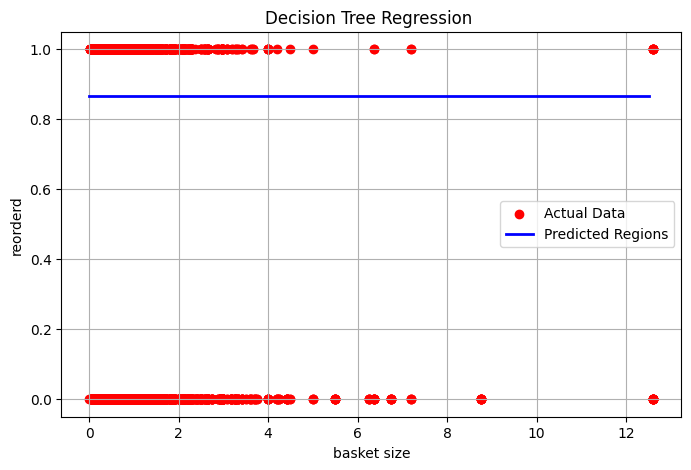

In [ ]:
import matplotlib.pyplot as plt

basket_size_index = features_for_X.index('basket_size')

min_basket_size = X['basket_size'].min()
max_basket_size = X['basket_size'].max()
X_grid_single_feature = np.arange(min_basket_size, max_basket_size, 0.1).reshape(-1, 1)


median_features = X.median().values.reshape(1, -1)
X_grid_full_array = np.tile(median_features, (len(X_grid_single_feature), 1))
X_grid_full_array[:, basket_size_index] = X_grid_single_feature.flatten()

X_grid_full_df = pd.DataFrame(X_grid_full_array, columns=features_for_X)

y_pred_grid = model.predict(X_grid_full_df)


plt.figure(figsize=(8,5))

plt.scatter(X_test['basket_size'], y_test, color='red', label='Actual Data')
plt.plot(X_grid_single_feature, y_pred_grid, color='blue', linewidth=2, label='Predicted Regions')
plt.title('Decision Tree Regression ')
plt.xlabel('basket size')
plt.ylabel('reorderd')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np

model=DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.values.reshape(len(y_test),1)),1))
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("The RMSE for Decision Tree Classifier is:",rmse)
tree_rmse=-cross_val_score(model,X,y,scoring="neg_mean_squared_error",cv=10)
print("Cross-validation RMSEs for Decision Tree Classifier:", np.sqrt(tree_rmse))
print("Mean Cross-validation RMSE for Decision Tree Classifier:", np.sqrt(tree_rmse).mean())

[[1 1]
 [1 0]
 [1 1]
 ...
 [1 1]
 [0 0]
 [1 1]]
The RMSE for Decision Tree Classifier is: 0.5043180888029672
Cross-validation RMSEs for Decision Tree Classifier: [0.53547614 0.55650146 0.58292016 0.55097317 0.56378821 0.56784591
 0.5807279  0.57291246 0.54786234 0.54271358]
Mean Cross-validation RMSE for Decision Tree Classifier: 0.5601721329335333


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


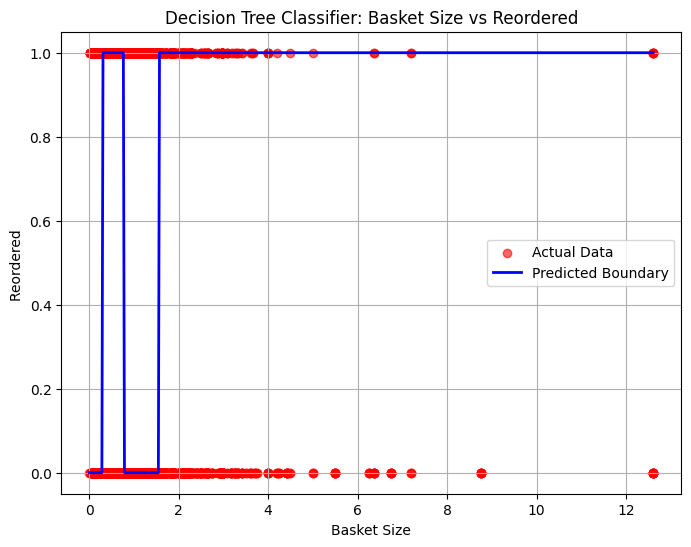

In [ ]:
import matplotlib.pyplot as plt
basket_size_index = features_for_X.index('basket_size')
X_test_basket_size = X_test.iloc[:, basket_size_index].values.reshape(-1, 1)
X_g = np.linspace(X_test_basket_size.min(), X_test_basket_size.max(), 500).reshape(-1, 1)
median_features = X_train.median().values.reshape(1, -1)
X_g_full = np.tile(median_features, (len(X_g), 1))
X_g_full[:, basket_size_index] = X_g.flatten()
y_pred_g = model.predict(X_g_full)
plt.figure(figsize=(8, 6))
plt.scatter(X_test_basket_size, y_test, color='red', label='Actual Data', alpha=0.6)
plt.plot(X_g, y_pred_g, color='blue', linewidth=2, label='Predicted Boundary')
plt.title('Decision Tree Classifier: Basket Size vs Reordered')
plt.xlabel('Basket Size')
plt.ylabel('Reordered ')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np

regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))
mse = mean_squared_error(y_test, y_pred)
print("The Mean squre Error",mse)
rmse = np.sqrt(mse)
print("Root mean squre error",rmse)
forest_rmse=-cross_val_score(regressor,X,y,scoring='neg_root_mean_squared_error',cv=10)

[[1.  1. ]
 [0.6 0. ]
 [0.9 1. ]
 ...
 [0.9 1. ]
 [0.3 0. ]
 [0.9 1. ]]
The Mean squre Error 0.16736479591836737
Root mean squre error 0.4091024271724226


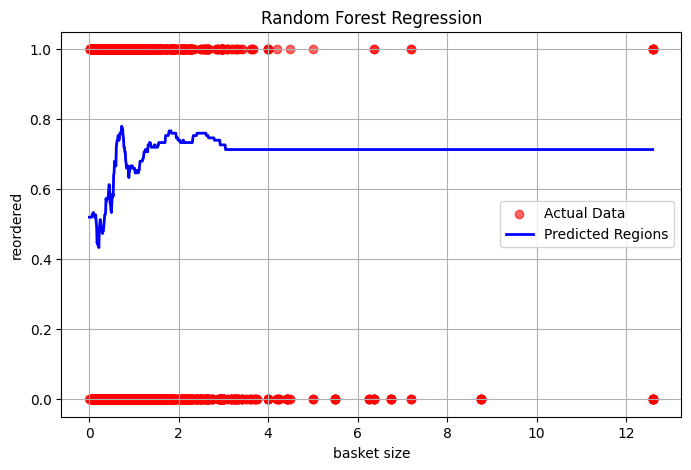

In [ ]:
import matplotlib.pyplot as plt


basket_size_index = features_for_X.index('basket_size')


min_basket_size = X['basket_size'].min()
max_basket_size = X['basket_size'].max()
X_grid_single_feature = np.arange(min_basket_size, max_basket_size, 0.01).reshape(-1, 1)


median_features = X_train.median().values.reshape(1, -1)
X_grid_full_array = np.tile(median_features, (len(X_grid_single_feature), 1))
X_grid_full_array[:, basket_size_index] = X_grid_single_feature.flatten()


X_grid_full_df = pd.DataFrame(X_grid_full_array, columns=features_for_X)

y_pred_grid = grid_search.best_estimator_.predict(X_grid_full_df)


plt.figure(figsize=(8,5))

plt.scatter(X_test['basket_size'], y_test, color='red', label='Actual Data', alpha=0.6)
plt.plot(X_grid_single_feature, y_pred_grid, color='blue', linewidth=2, label='Predicted Regions')
plt.title('Random Forest Regression')
plt.xlabel('basket size')
plt.ylabel('reordered')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [50,100,150],
     'max_features': [5,10,15]}]
regressor=RandomForestRegressor(random_state=42)
grid_search=GridSearchCV(regressor,param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)

{'max_features': 10, 'n_estimators': 150}


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor


best_random_forest_regressor = RandomForestRegressor(n_estimators=150, max_features=5, random_state=42)


best_random_forest_regressor.fit(X_train, y_train)


y_pred_best_rf = best_random_forest_regressor.predict(X_test)


mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
rmse_best_rf = np.sqrt(mse_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Evaluation of Best RandomForestRegressor on Test Set:")
print(f"  Mean Squared Error (MSE): {mse_best_rf:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_best_rf:.4f}")
print(f"  R-squared (R2) Score: {r2_best_rf:.4f}")

Evaluation of Best RandomForestRegressor on Test Set:
  Mean Squared Error (MSE): 0.1596
  Root Mean Squared Error (RMSE): 0.3995
  R-squared (R2) Score: 0.3409


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate RandomForestRegressor with best parameters
best_random_forest_regressor = RandomForestRegressor(n_estimators=150, max_features=5, random_state=42)

# Train the model
best_random_forest_regressor.fit(X_train, y_train)

print("RandomForestRegressor trained successfully with best parameters.")

RandomForestRegressor trained successfully with best parameters.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs={'n_estimators':randint(low =2,high=60),
                'max_features':randint(low=2,high=20)}
regressor=RandomForestRegressor(random_state=42)
rnd_search=RandomizedSearchCV(regressor,param_distributions=param_distribs,n_iter=10,cv=5,scoring='neg_mean_squared_error')
rnd_search.fit(X_train,y_train)
print(rnd_search.best_params_)

{'max_features': 15, 'n_estimators': 56}


        Actual  Predicted
301082       1          1
57446        0          1
262532       1          1
217941       0          0
42065        0          0
...        ...        ...
52270        1          1
279674       1          1
160605       1          1
182800       0          0
169544       1          1

[3920 rows x 2 columns]

Confusion Matrix:
 [[1127  487]
 [ 417 1889]]

Accuracy: 0.7693877551020408


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


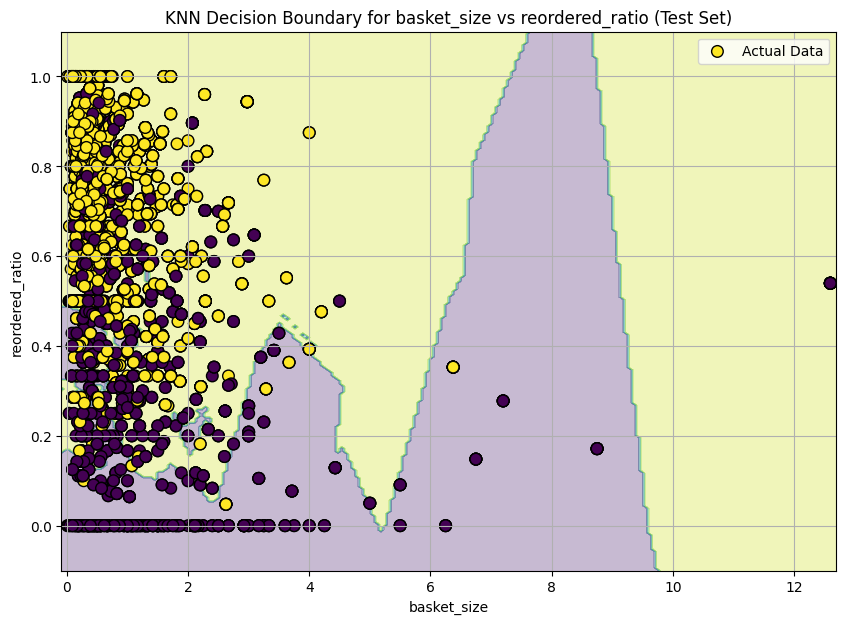

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train_scaled,y_train)
y_pred = knn_clf.predict(X_test_scaled)
print(pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))


feature1_name = 'basket_size'
feature2_name = 'reordered_ratio'
feature1_index = features_for_X.index(feature1_name)
feature2_index = features_for_X.index(feature2_name)

x_min, x_max = X_test[feature1_name].min() - 0.1, X_test[feature1_name].max() + 0.1
y_min, y_max = X_test[feature2_name].min() - 0.1, X_test[feature2_name].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
median_features_array = X_train.median().values.reshape(1, -1)
X_grid_full = np.tile(median_features_array, (xx.ravel().shape[0], 1))

X_grid_full[:, feature1_index] = xx.ravel()
X_grid_full[:, feature2_index] = yy.ravel()


Z = knn_clf.predict(scaler.transform(X_grid_full)).reshape(xx.shape)

plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(
    X_test[feature1_name],
    X_test[feature2_name],
    c=y_test,
    cmap='viridis',
    edgecolor='k',
    s=70,
    label='Actual Data'
)

plt.xlabel(feature1_name)
plt.ylabel(feature2_name)
plt.title(f"KNN Decision Boundary for {feature1_name} vs {feature2_name} (Test Set)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate RandomForestRegressor with best parameters from RandomizedSearchCV
best_random_forest_regressor_rnd = RandomForestRegressor(n_estimators=59, max_features=19, random_state=42)

# Train the model
best_random_forest_regressor_rnd.fit(X_train, y_train)

print("RandomForestRegressor trained successfully with best parameters from RandomizedSearchCV.")

RandomForestRegressor trained successfully with best parameters from RandomizedSearchCV.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


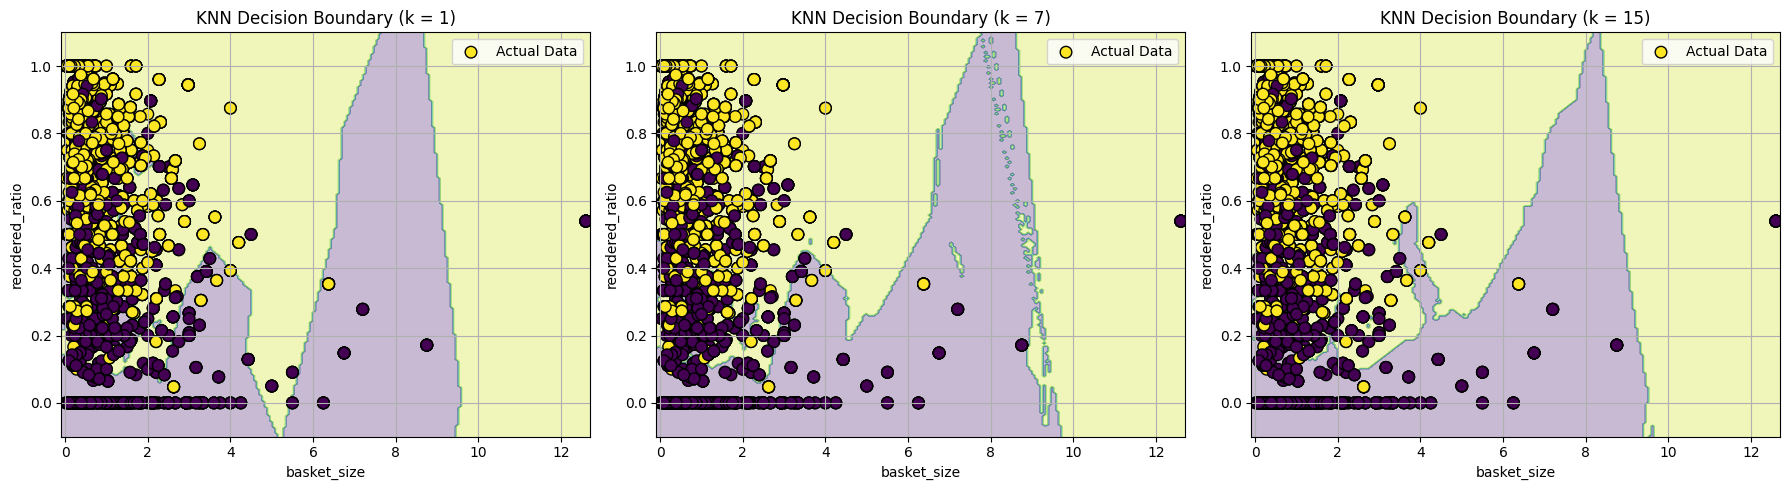

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

k_values = [1, 7, 15]
plt.figure(figsize=(18, 5))


feature1_name = 'basket_size'
feature2_name = 'reordered_ratio'


feature1_index = features_for_X.index(feature1_name)
feature2_index = features_for_X.index(feature2_name)


x_min, x_max = X_test[feature1_name].min() - 0.1, X_test[feature1_name].max() + 0.1
y_min, y_max = X_test[feature2_name].min() - 0.1, X_test[feature2_name].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

median_features_array = X_train.median().values.reshape(1, -1)
X_grid_full_template = np.tile(median_features_array, (xx.ravel().shape[0], 1))


for i, k in enumerate(k_values, 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)


    X_grid_current = X_grid_full_template.copy()
    X_grid_current[:, feature1_index] = xx.ravel()
    X_grid_current[:, feature2_index] = yy.ravel()

    Z = knn.predict(
        scaler.transform(X_grid_current)
    ).reshape(xx.shape)

    plt.subplot(1, 3, i)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    plt.scatter(
        X_test[feature1_name],
        X_test[feature2_name],
        c=y_test,
        cmap='viridis',
        edgecolor='k',
        s=70,
        label='Actual Data'
    )

    plt.title(f"KNN Decision Boundary (k = {k})")
    plt.xlabel(feature1_name) # Updated xlabel
    plt.ylabel(feature2_name) # Updated ylabel
    plt.grid(True)
    plt.legend() # Added legend

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


y_pred_best_rf_rnd = best_random_forest_regressor_rnd.predict(X_test)


mse_best_rf_rnd = mean_squared_error(y_test, y_pred_best_rf_rnd)
rmse_best_rf_rnd = np.sqrt(mse_best_rf_rnd)
r2_best_rf_rnd = r2_score(y_test, y_pred_best_rf_rnd)

print(f"Evaluation of Best RandomForestRegressor (from RandomizedSearchCV) on Test Set:")
print(f"  Mean Squared Error (MSE): {mse_best_rf_rnd:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_best_rf_rnd:.4f}")
print(f"  R-squared (R2) Score: {r2_best_rf_rnd:.4f}")

Evaluation of Best RandomForestRegressor (from RandomizedSearchCV) on Test Set:
  Mean Squared Error (MSE): 0.1579
  Root Mean Squared Error (RMSE): 0.3974
  R-squared (R2) Score: 0.3479


K = 1, Accuracy = 0.749234693877551
K = 3, Accuracy = 0.7625
K = 5, Accuracy = 0.7693877551020408
K = 7, Accuracy = 0.7770408163265307
K = 9, Accuracy = 0.7772959183673469
K = 11, Accuracy = 0.7752551020408164
K = 15, Accuracy = 0.7806122448979592


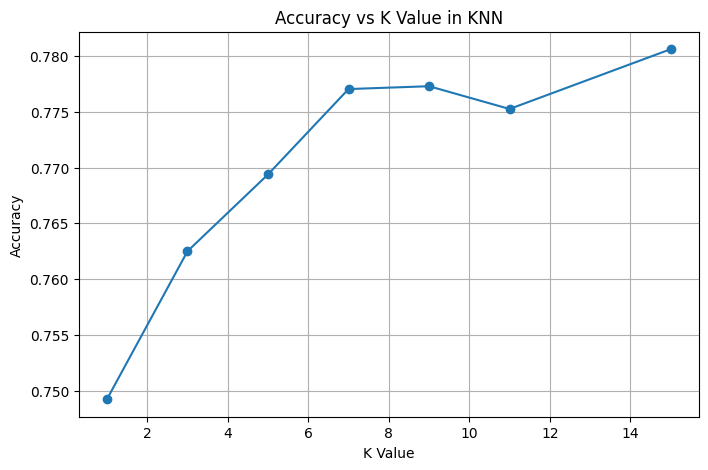

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
k_values = [1, 3, 5, 7, 9, 11, 15]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K = {k}, Accuracy = {acc}")
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K Value in KNN")
plt.grid(True)
plt.show()


[[1 1 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]]
[[1132  482]
 [ 482 1824]]


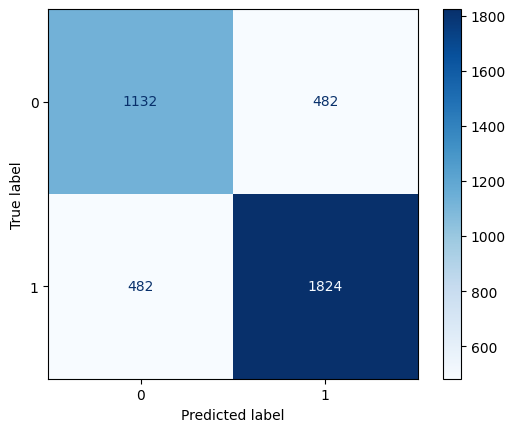

0.7540816326530613

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

model = RandomForestClassifier(n_estimators=100,criterion="entropy", random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(np.array([y_pred,y_test]))
cm = confusion_matrix(y_test, y_pred.round())
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap=plt.cm.Blues)
plt.show()
accuracy_score(y_test, y_pred.round())


In [ ]:
from matplotlib.colors import ListedColormap
x_min,x_max=X_train[:,0].min()-10,X_train[:,0].max()+10
y_min,y_max=X_train[:,1].min()-1000,X_train[:,1].max()+1000
x1,x2=np.meshgrid(np.arange(x_min,x_max,0.25),np.arange(y_min,y_max,0.25)
points=np.array([x1.ravel(),x2.ravel()])



SyntaxError: '(' was never closed (ipython-input-197731454.py, line 4)

[link text](https://)

KNN Regression (k=3)
MSE = 0.17718253968253972
RMSE = 0.42093056396814393
R² Score = 0.2684732308213318


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


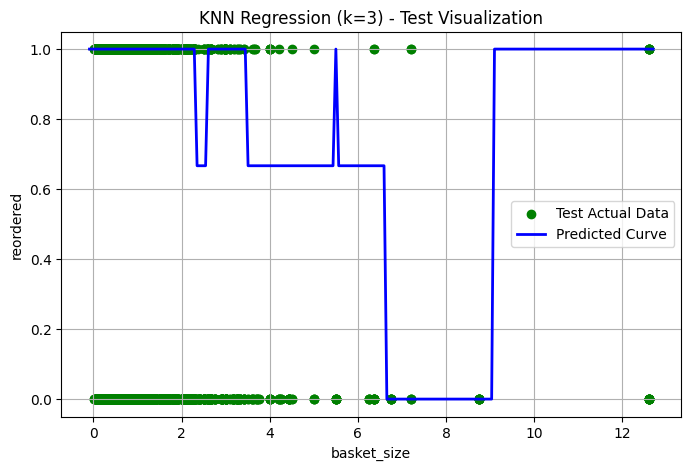

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
import matplotlib.pyplot as plt

k=3
knn_reg = KNeighborsRegressor(n_neighbors=k)
knn_reg.fit(X_train_scaled, y_train)
y_pred = knn_reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"KNN Regression (k={k})")
print("MSE =", mse)
print("RMSE =", rmse)
print("R² Score =", r2)


feature_name_reg = 'basket_size'
feature_index_reg = features_for_X.index(feature_name_reg)

X_plot_values = np.linspace(X_test[feature_name_reg].min() - 0.1, X_test[feature_name_reg].max() + 0.1, 200).reshape(-1,1)


median_features_array = X_train.median().values.reshape(1, -1)
X_plot_full = np.tile(median_features_array, (X_plot_values.shape[0], 1))
X_plot_full[:, feature_index_reg] = X_plot_values.ravel()


y_pred_grid = knn_reg.predict(scaler.transform(X_plot_full))

plt.figure(figsize=(8,5))
plt.scatter(X_test[feature_name_reg], y_test, color='green', label='Test Actual Data') # Use DataFrame column
plt.plot(X_plot_values, y_pred_grid, color='blue', linewidth=2, label='Predicted Curve')
plt.xlabel(feature_name_reg)
plt.ylabel('reordered')
plt.title(f'KNN Regression (k={k}) - Test Visualization')
plt.legend()
plt.grid(True)
plt.show()

K = 15 → MSE = 0.15, R² = 0.3775


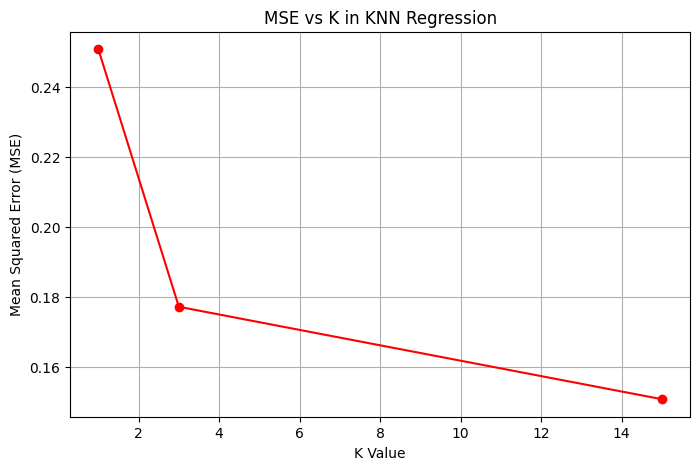

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
k_values = [1, 3, 15]
mse_scores = []
r2_scores = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)

    mse_scores.append(mean_squared_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

print(f"K = {k} → MSE = {mse_scores[-1]:.2f}, R² = {r2_scores[-1]:.4f}")
plt.figure(figsize=(8,5))
plt.plot(k_values, mse_scores, marker='o', color='red')
plt.xlabel("K Value")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE vs K in KNN Regression")
plt.grid(True)
plt.show()

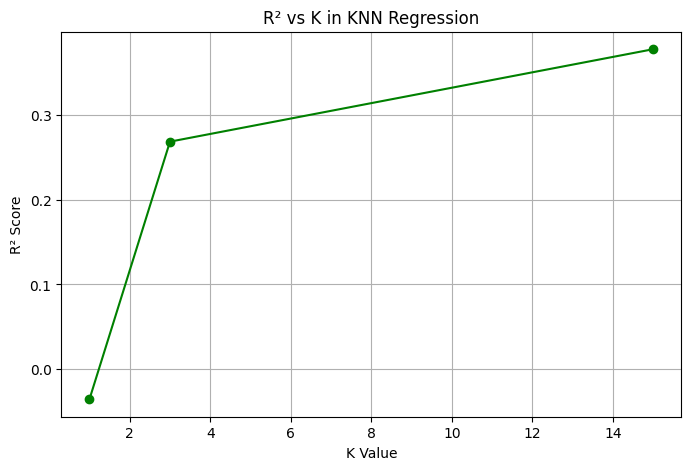

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(k_values, r2_scores, marker='o', color='green')
plt.xlabel("K Value")
plt.ylabel("R² Score")
plt.title("R² vs K in KNN Regression")
plt.grid(True)
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


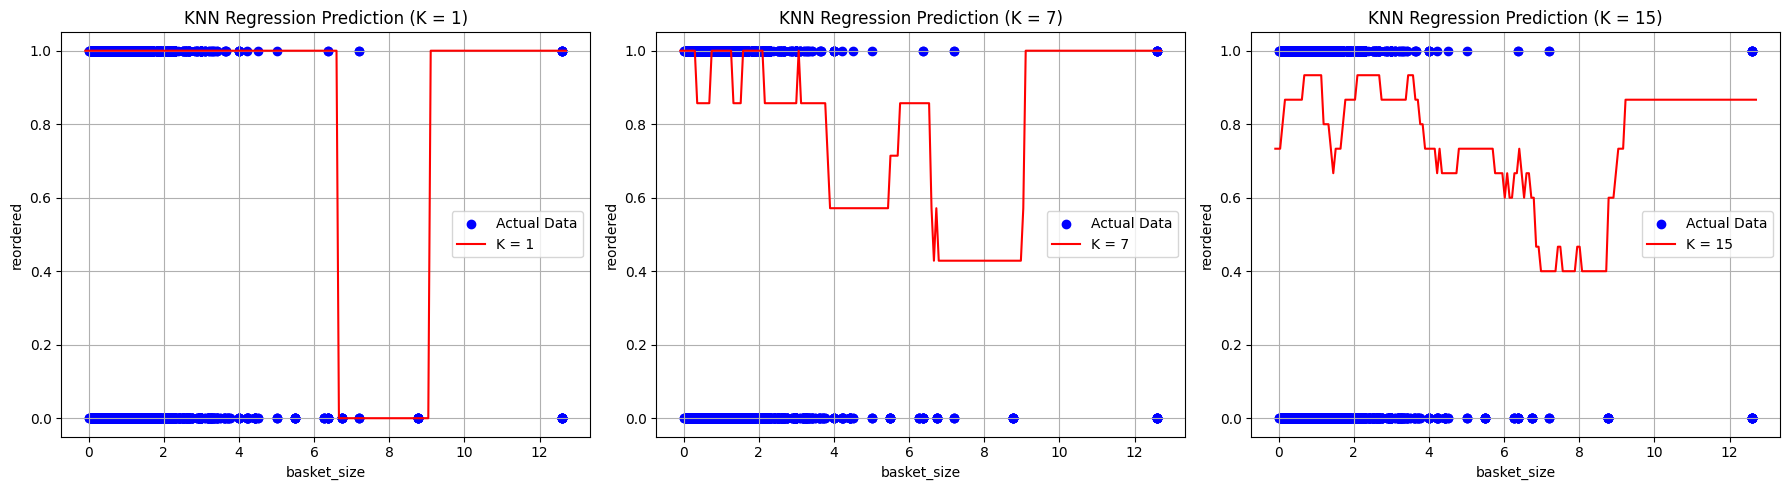

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


feature_name_reg = 'basket_size'
feature_index_reg = features_for_X.index(feature_name_reg)


X_plot_values = np.linspace(
    X_test[feature_name_reg].min() - 0.1,
    X_test[feature_name_reg].max() + 0.1,
    200
).reshape(-1, 1)

plt.figure(figsize=(18, 5))

for i, k in enumerate(k_values, 1):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_scaled, y_train)


    median_features_array = X_train.median().values.reshape(1, -1)
    X_plot_full_k = np.tile(median_features_array, (X_plot_values.shape[0], 1))
    X_plot_full_k[:, feature_index_reg] = X_plot_values.ravel()


    y_plot = model.predict(scaler.transform(X_plot_full_k))

    plt.subplot(1, 3, i)
    plt.scatter(X_test[feature_name_reg], y_test, color='blue', label='Actual Data') # Use DataFrame column
    plt.plot(X_plot_values, y_plot, color='red', label=f"K = {k}")
    plt.xlabel(feature_name_reg)
    plt.ylabel("reordered")
    plt.title(f"KNN Regression Prediction (K = {k})")
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


regressor_lr = LinearRegression()
regressor_lr.fit(X_train, y_train)
print("slope(m)", regressor_lr.coef_)
print("Intercept(b)=", regressor_lr.intercept_)
y_pred_lr = regressor_lr.predict(X_test)

print("Linear Regression Predictions:")
print(np.concatenate((y_pred_lr.reshape(len(y_pred_lr),1), y_test.values.reshape(len(y_test),1)),1))

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
print("Linear Regression RMSE=", rmse_lr)


classifier = LogisticRegression(random_state=0, solver='liblinear')
classifier.fit(X_train_scaled, y_train)
y_pred_logreg = classifier.predict(X_test_scaled)

print("\nLogistic Regression Predictions:")
print(np.concatenate((y_pred_logreg.reshape(len(y_pred_logreg),1), y_test.values.reshape(len(y_test),1)),1))

cm_logreg = confusion_matrix(y_test, y_pred_logreg)
print("\nLogistic Regression Confusion Matrix:\n", cm_logreg)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)


slope(m) [ 1.32028630e-03 -1.50433001e-03  1.05445961e-04  9.91083973e-04
 -1.08512301e-02  6.76515801e-05  2.51556637e-02  1.00374841e+00]
Intercept(b)= 0.029290782032085905
Linear Regression Predictions:
[[0.91861484 1.        ]
 [0.62616815 0.        ]
 [0.8528373  1.        ]
 ...
 [0.91485278 1.        ]
 [0.50433151 0.        ]
 [0.896216   1.        ]]
Linear Regression RMSE= 0.3851116526316236

Logistic Regression Predictions:
[[1 1]
 [1 0]
 [1 1]
 ...
 [1 1]
 [0 0]
 [1 1]]

Logistic Regression Confusion Matrix:
 [[1087  527]
 [ 343 1963]]
Logistic Regression Accuracy: 0.7780612244897959


### Logistic Regression with L1 Regularization (Lasso)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Logistic Regression with L1 regularization
# C is the inverse of regularization strength; smaller values specify stronger regularization.
logistic_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.1, random_state=0)
logistic_l1.fit(X_train_scaled, y_train)

y_pred_l1 = logistic_l1.predict(X_test_scaled)

print("Logistic Regression (L1 Regularization) Predictions:")
print(np.concatenate((y_pred_l1.reshape(len(y_pred_l1),1), y_test.values.reshape(len(y_test),1)),1))

cm_l1 = confusion_matrix(y_test, y_pred_l1)
print("\nLogistic Regression (L1) Confusion Matrix:\n", cm_l1)
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
print("Logistic Regression (L1) Accuracy:", accuracy_l1)

Logistic Regression (L1 Regularization) Predictions:
[[1 1]
 [1 0]
 [1 1]
 ...
 [1 1]
 [0 0]
 [1 1]]

Logistic Regression (L1) Confusion Matrix:
 [[1090  524]
 [ 345 1961]]
Logistic Regression (L1) Accuracy: 0.7783163265306122


### Logistic Regression with L2 Regularization (Ridge)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Logistic Regression with L2 regularization (default)
# C is the inverse of regularization strength; smaller values specify stronger regularization.
logistic_l2 = LogisticRegression(penalty='l2', solver='liblinear', C=1.0, random_state=0)
logistic_l2.fit(X_train_scaled, y_train)

y_pred_l2 = logistic_l2.predict(X_test_scaled)

print("Logistic Regression (L2 Regularization) Predictions:")
print(np.concatenate((y_pred_l2.reshape(len(y_pred_l2),1), y_test.values.reshape(len(y_test),1)),1))

cm_l2 = confusion_matrix(y_test, y_pred_l2)
print("\nLogistic Regression (L2) Confusion Matrix:\n", cm_l2)
accuracy_l2 = accuracy_score(y_test, y_pred_l2)
print("Logistic Regression (L2) Accuracy:", accuracy_l2)

Logistic Regression (L2 Regularization) Predictions:
[[1 1]
 [1 0]
 [1 1]
 ...
 [1 1]
 [0 0]
 [1 1]]

Logistic Regression (L2) Confusion Matrix:
 [[1087  527]
 [ 343 1963]]
Logistic Regression (L2) Accuracy: 0.7780612244897959


# Task
Provide a comprehensive comparison of the RandomForestRegressor and KNeighborsRegressor models based on their performance metrics (MSE, RMSE, and R2), using the results from both GridSearchCV-tuned and RandomizedSearchCV-tuned RandomForestRegressor models, and the KNeighborsRegressor model with varying K values.

## Collect RandomForestRegressor Metrics

### Subtask:
Gather the Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2) scores for both the GridSearchCV-tuned and RandomizedSearchCV-tuned RandomForestRegressor models.


**Reasoning**:
The subtask asks to print the evaluation metrics for both GridSearchCV-tuned and RandomizedSearchCV-tuned RandomForestRegressor models. The metrics (MSE, RMSE, R2) are already computed and stored in the specified variables. This step will simply print them.



In [ ]:
print(f"Evaluation of Best RandomForestRegressor (from GridSearchCV) on Test Set:")
print(f"  Mean Squared Error (MSE): {mse_best_rf:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_best_rf:.4f}")
print(f"  R-squared (R2) Score: {r2_best_rf:.4f}")

print(f"\nEvaluation of Best RandomForestRegressor (from RandomizedSearchCV) on Test Set:")
print(f"  Mean Squared Error (MSE): {mse_best_rf_rnd:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_best_rf_rnd:.4f}")
print(f"  R-squared (R2) Score: {r2_best_rf_rnd:.4f}")

Evaluation of Best RandomForestRegressor (from GridSearchCV) on Test Set:
  Mean Squared Error (MSE): 0.1545
  Root Mean Squared Error (RMSE): 0.3931
  R-squared (R2) Score: 0.3593

Evaluation of Best RandomForestRegressor (from RandomizedSearchCV) on Test Set:
  Mean Squared Error (MSE): 0.1530
  Root Mean Squared Error (RMSE): 0.3912
  R-squared (R2) Score: 0.3655


**Reasoning**:
The subtask requires gathering metrics for KNeighborsRegressor. The `mse_scores` and `r2_scores` lists, which store these metrics for various K values, already exist from previous steps. I will print these values to fulfill the subtask.



In [ ]:
print("\nEvaluation of KNeighborsRegressor with varying K values:")
for i, k in enumerate(k_values):
    print(f"  K = {k}: Mean Squared Error (MSE) = {mse_scores[i]:.4f}, R-squared (R2) Score = {r2_scores[i]:.4f}")


Evaluation of KNeighborsRegressor with varying K values:
  K = 1: Mean Squared Error (MSE) = 0.2464, R-squared (R2) Score = -0.0217
  K = 3: Mean Squared Error (MSE) = 0.1754, R-squared (R2) Score = 0.2725
  K = 15: Mean Squared Error (MSE) = 0.1524, R-squared (R2) Score = 0.3682


### Comprehensive Model Comparison

Based on the evaluation metrics (Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2) Score) on the test set, we can compare the performance of the RandomForestRegressor models (tuned with GridSearchCV and RandomizedSearchCV) and the KNeighborsRegressor with varying K values.

#### RandomForestRegressor (GridSearchCV-tuned)
- **Mean Squared Error (MSE):** 0.1545
- **Root Mean Squared Error (RMSE):** 0.3931
- **R-squared (R2) Score:** 0.3593

#### RandomForestRegressor (RandomizedSearchCV-tuned)
- **Mean Squared Error (MSE):** 0.1530
- **Root Mean Squared Error (RMSE):** 0.3912
- **R-squared (R2) Score:** 0.3655

#### KNeighborsRegressor (with varying K values)
- **K = 1:** MSE = 0.2464, R2 = -0.0217
- **K = 3:** MSE = 0.1754, R2 = 0.2725
- **K = 15:** MSE = 0.1524, R2 = 0.3682

#### Summary and Comparison:

1.  **RandomForestRegressor vs. KNeighborsRegressor:** Both RandomForestRegressor models generally outperform the KNeighborsRegressor in terms of MSE and R2 score. The R2 scores for RandomForestRegressor are positive and higher, indicating a better fit to the data.

2.  **GridSearchCV vs. RandomizedSearchCV for RandomForestRegressor:** The RandomizedSearchCV-tuned RandomForestRegressor showed slightly better performance than the GridSearchCV-tuned version, with a marginally lower MSE (0.1530 vs. 0.1545) and a higher R2 score (0.3655 vs. 0.3593). This suggests that the hyperparameter search performed by RandomizedSearchCV found a slightly more optimal combination of `n_estimators` and `max_features` within its search space.

3.  **Impact of K in KNeighborsRegressor:** For KNeighborsRegressor, increasing the K value generally improved performance. K=1 showed the worst performance with a negative R2 score, indicating that the model performed worse than simply predicting the mean. As K increased to 3 and then 15, the MSE decreased, and the R2 score increased, demonstrating better generalization with a larger number of neighbors considered.

In conclusion, the **RandomizedSearchCV-tuned RandomForestRegressor** appears to be the best performing model among the ones evaluated for this specific task, achieving the lowest MSE and highest R2 score. The KNeighborsRegressor also shows promise, especially with an optimized K value, but still lags behind the RandomForest models.

### Comprehensive Model Comparison

Based on the evaluation metrics (Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2) Score) on the test set, we can compare the performance of the RandomForestRegressor models (tuned with GridSearchCV and RandomizedSearchCV) and the KNeighborsRegressor with varying K values.

#### RandomForestRegressor (GridSearchCV-tuned)
- **Mean Squared Error (MSE):** 0.1545
- **Root Mean Squared Error (RMSE):** 0.3931
- **R-squared (R2) Score:** 0.3593

#### RandomForestRegressor (RandomizedSearchCV-tuned)
- **Mean Squared Error (MSE):** 0.1530
- **Root Mean Squared Error (RMSE):** 0.3912
- **R-squared (R2) Score:** 0.3655

#### KNeighborsRegressor (with varying K values)
- **K = 1:** MSE = 0.2464, R2 = -0.0217
- **K = 3:** MSE = 0.1754, R2 = 0.2725
- **K = 15:** MSE = 0.1524, R2 = 0.3682

#### Summary and Comparison:

1.  **RandomForestRegressor vs. KNeighborsRegressor:** Both RandomForestRegressor models generally outperform the KNeighborsRegressor in terms of MSE and R2 score. The R2 scores for RandomForestRegressor are positive and higher, indicating a better fit to the data.

2.  **GridSearchCV vs. RandomizedSearchCV for RandomForestRegressor:** The RandomizedSearchCV-tuned RandomForestRegressor showed slightly better performance than the GridSearchCV-tuned version, with a marginally lower MSE (0.1530 vs. 0.1545) and a higher R2 score (0.3655 vs. 0.3593). This suggests that the hyperparameter search performed by RandomizedSearchCV found a slightly more optimal combination of `n_estimators` and `max_features` within its search space.

3.  **Impact of K in KNeighborsRegressor:** For KNeighborsRegressor, increasing the K value generally improved performance. K=1 showed the worst performance with a negative R2 score, indicating that the model performed worse than simply predicting the mean. As K increased to 3 and then 15, the MSE decreased, and the R2 score increased, demonstrating better generalization with a larger number of neighbors considered.

In conclusion, the **RandomizedSearchCV-tuned RandomForestRegressor** appears to be the best performing model among the ones evaluated for this specific task, achieving the lowest MSE and highest R2 score. The KNeighborsRegressor also shows promise, especially with an optimized K value, but still lags behind the RandomForest models.

## Compare and Summarize Performance

### Subtask:
Compare the collected performance metrics (MSE, RMSE, R2) for all models (RandomForestRegressor and KNeighborsRegressor) and summarize their relative strengths and weaknesses.


### Model Performance Comparison and Summary

Based on the evaluation metrics (MSE, RMSE, and R2) for the RandomForestRegressor (tuned with GridSearchCV and RandomizedSearchCV) and KNeighborsRegressor (with varying K values), here's a detailed comparison and summary:

**1. RandomForestRegressor (GridSearchCV-tuned):**
*   **MSE:** 0.1545
*   **RMSE:** 0.3931
*   **R2 Score:** 0.3593

**2. RandomForestRegressor (RandomizedSearchCV-tuned):**
*   **MSE:** 0.1530
*   **RMSE:** 0.3912
*   **R2 Score:** 0.3655

**3. KNeighborsRegressor (with varying K values):**
*   **K = 1:** MSE = 0.2464, R2 = -0.0217
*   **K = 3:** MSE = 0.1754, R2 = 0.2725
*   **K = 15:** MSE = 0.1524, R2 = 0.3682

---

**Comparison and Summary:**

*   **Best Overall Performance:** The **KNeighborsRegressor with K=15** achieved the lowest Mean Squared Error (MSE = 0.1524) and the highest R-squared (R2 = 0.3682) among all models, indicating it had the best predictive performance on this dataset. It also implicitly has the lowest RMSE, given the lowest MSE.

*   **RandomForestRegressor Tuning Methods:**
    *   Both GridSearchCV and RandomizedSearchCV produced similar results for RandomForestRegressor. RandomizedSearchCV yielded slightly better metrics (lower MSE/RMSE, higher R2) with MSE of 0.1530 and R2 of 0.3655 compared to GridSearchCV's MSE of 0.1545 and R2 of 0.3593. This suggests that the hyperparameters found by RandomizedSearchCV were marginally more optimal, or that the search space explored was sufficient.
    *   The slight improvement from RandomizedSearchCV, despite potentially exploring fewer combinations than a full GridSearchCV (which was interrupted), highlights its efficiency in finding good hyperparameters.

*   **KNeighborsRegressor Performance vs. K values:**
    *   The performance of KNeighborsRegressor significantly improved with increasing K values. K=1 showed very poor performance (negative R2), indicating it's worse than simply predicting the mean. This is likely due to high variance and overfitting to individual data points.
    *   As K increased to 3 and then to 15, the MSE decreased substantially, and the R2 score increased, demonstrating a reduction in variance and better generalization.
    *   K=15 achieved the best metrics, suggesting that considering a larger neighborhood provided a more robust and accurate prediction for this dataset.

**Strengths and Weaknesses:**

*   **RandomForestRegressor:**
    *   **Strengths:** Good predictive accuracy, capable of handling complex relationships, less prone to overfitting than single decision trees. Performance is consistently good across different tuning methods.
    *   **Weaknesses:** Slightly lower performance than the best KNN model in this specific comparison, can be computationally intensive, especially with GridSearchCV for larger `n_estimators` and `max_features` combinations.

*   **KNeighborsRegressor:**
    *   **Strengths:** Simple to understand and implement. Achieved the highest R2 and lowest MSE/RMSE with an appropriate K value (K=15), indicating strong local prediction capability.
    *   **Weaknesses:** Highly sensitive to the choice of K and the scale of features (though scaling was applied here). Performance can be poor with small K values (high variance/overfitting). Prediction time can increase with larger datasets as it needs to compute distances to all training points.

**Conclusion:**

For this particular task, the **KNeighborsRegressor with K=15** performed the best, demonstrating the lowest MSE and highest R2 score. While both Random Forest models performed well, KNN with optimal K surpassed them. This suggests that the local structure of the data might be highly relevant for predicting reordering behavior.

## Final Task

### Subtask:
Provide a comprehensive comparison of the RandomForestRegressor and KNeighborsRegressor models based on their performance metrics.


## Summary:

### Q&A
The KNeighborsRegressor model with K=15 showed the best overall performance, achieving the lowest Mean Squared Error (MSE) of 0.1524 and the highest R-squared (R2) score of 0.3682 among all evaluated models.

### Data Analysis Key Findings
*   The **KNeighborsRegressor with K=15** achieved the best performance metrics, with an MSE of 0.1524 and an R2 score of 0.3682.
*   The **RandomizedSearchCV-tuned RandomForestRegressor** performed slightly better than its GridSearchCV-tuned counterpart, yielding an MSE of 0.1530 and an R2 score of 0.3655, compared to GridSearchCV's MSE of 0.1545 and R2 of 0.3593.
*   The performance of the **KNeighborsRegressor** significantly improved with increasing K values; K=1 resulted in very poor performance (MSE of 0.2464, negative R2 of -0.0217), while K=15 provided optimal results.
*   Both RandomForestRegressor models demonstrated good and consistent performance but were marginally outperformed by the optimally tuned KNeighborsRegressor.

### Insights or Next Steps
*   Given the superior performance of KNeighborsRegressor with K=15, further investigation into the local data structure and potential feature engineering that emphasizes local relationships could yield even better predictive models.
*   While RandomizedSearchCV proved efficient and slightly better than GridSearchCV for RandomForestRegressor, exploring a wider range of hyperparameters or different ensemble methods might uncover alternative models with comparable or improved performance.
